#IMPORTING NECESSARY DEPENDENCIES



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 13.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=0d2411f8707e13fd99aca656fd885ac0b47ffc168e23c021cd6b764380689130
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


## IMPORTING NECESSARY PACKAGES

In [ ]:
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## LOAD CORONA TWEETS SENTIMENT ANALYSIS DATASET

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Busniessonbot/BusinessonBot_Task_Assessment-main/CoronaTweetsSentimentAnalysis.csv')
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


## FINDING UNIQUE SENTIMENT (POSTIVE & NEGATIVE)

In [ ]:
data['Sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

## DIFFERENT VISUALIZATIONS FOR SENTIMENTS OF TWEETS

In [ ]:
import plotly.express as px
fig = px.pie(data, names='Sentiment',color_discrete_sequence=px.colors.sequential.RdBu,title ='Pie chart of different sentiments of tweets')
fig.show()

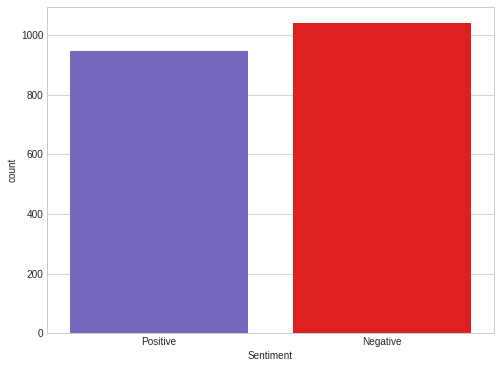

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))
col = ['slateblue', 'red']
ax = sns.countplot(x="Sentiment", data=data, palette = col)

In [ ]:
data['Location'].value_counts()

United States             42
London, England           25
Washington, DC            22
New York, NY              20
Los Angeles, CA           16
                          ..
Paris, France              1
FB.me/EnglishInRomania     1
West Palm Beach, FL        1
310                        1
Farmington, NM             1
Name: Location, Length: 1019, dtype: int64

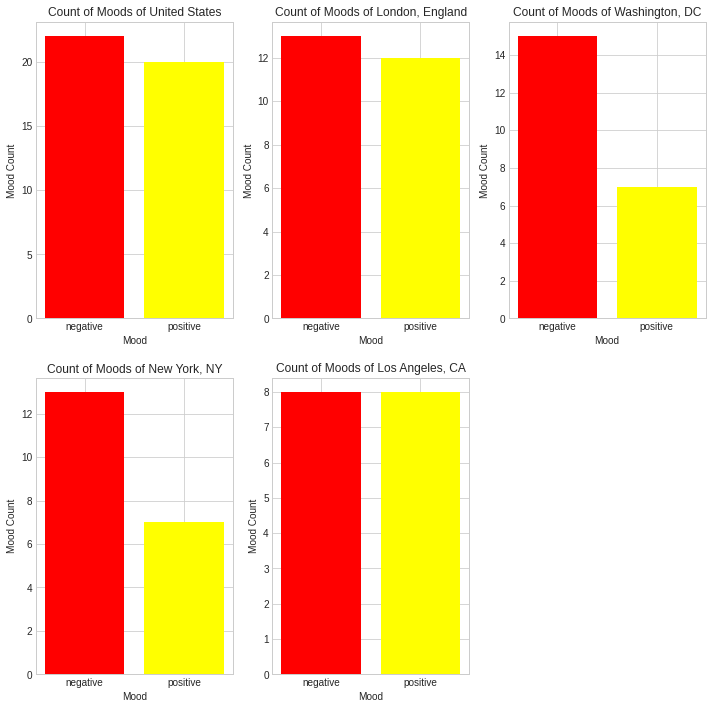

In [ ]:
## taking TOP 5 Location for better Visulaization of tweet sentiments
location= ['United States','London, England','Washington, DC','New York, NY','Los Angeles, CA']
plt.figure(1,figsize=(12, 12))
for i in location:
    indices= location.index(i)
    plt.subplot(2,3,indices+1)
    new_df=data[data['Location']==i]
    count=new_df['Sentiment'].value_counts()
    Index = [1,2]
    plt.bar(Index,count, color=['red', 'yellow'])
    plt.xticks(Index,['negative','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

## FREQUENTLY USED TWEET WORDS FOR NEGATIVE TWEETS

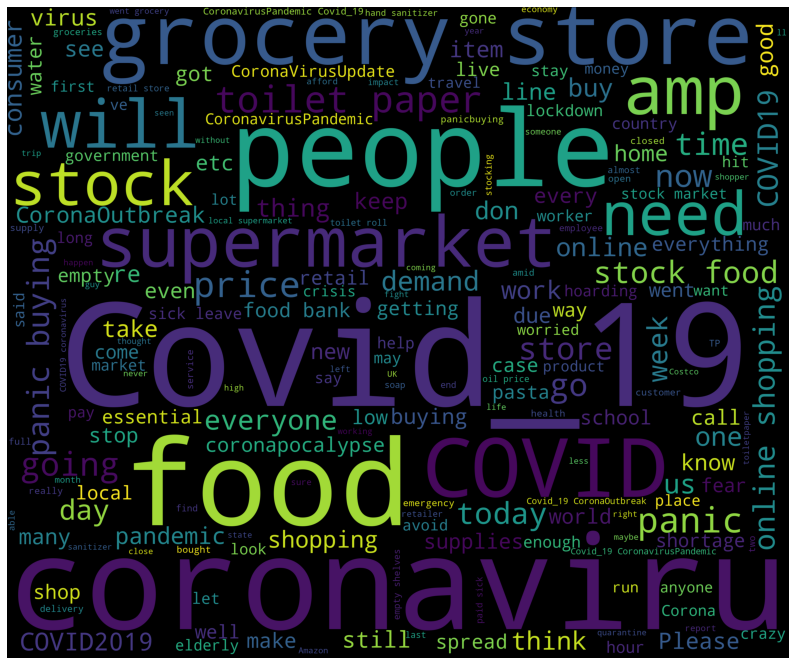

In [ ]:
from wordcloud import WordCloud, STOPWORDS
new_df=data[data['Sentiment']=='Negative']
words = ' '.join(new_df['OriginalTweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## FREQUENTLY USED WORDS FOR POSTIVE TWEETS

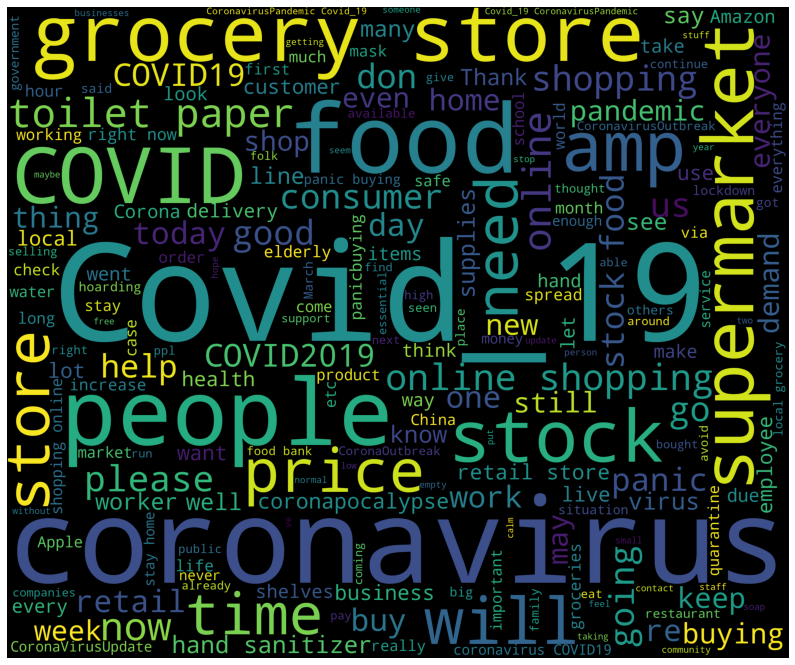

In [ ]:
new_df=data[data['Sentiment']=='Positive']
words = ' '.join(new_df['OriginalTweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

                 

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


 
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision, color = 'orange')
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Are under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr, color='mediumblue')
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc



def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

## DATA PRE-PROCESSING:

# Data pre-processing includes removing stopwords, punctuation marks and encoding the categorical column called 'Sentiment' to numerical values(0-->Negative,1-->Postive).

In [ ]:
data['cleaned_tweet'] = data['OriginalTweet'].apply(clean_the_tweet)
data['Sentiment'] = data['Sentiment'].apply(lambda x: 1 if x =='Positive' else 0)
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,1,couldn t find hand sanitizer at fred meyer i t...
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0,hits newyork city as anxious shoppers stock up...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,1,the age of coronavirus hand sanitizer supertue...
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,1,couches at unbelievably low prices available t...
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,1,were busy watching election returns and bracin...


In [ ]:
# Cleaning the tweets, removing punctuation marks
data['cleaned_tweet'] = data['cleaned_tweet'].apply(text_process)
data.reset_index(drop=True, inplace = True)
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,1,find hand sanitizer fred meyer turned amazon p...
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0,hits newyork city anxious shoppers stock food ...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,1,age coronavirus hand sanitizer supertuesday ht...
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,1,couches unbelievably low prices available orde...
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,1,busy watching election returns bracing covid o...


In [ ]:
data['Sentiment'].unique()

array([1, 0])

In [ ]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(data.cleaned_tweet)
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, data['Sentiment'], random_state=42)

## SVM MODEL

Train confusion matrix is: 
[[775   0]
 [  2 714]]

Test confusion matrix is: 
[[209  57]
 [113 118]]

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       266
           1       0.67      0.51      0.58       231

    accuracy                           0.66       497
   macro avg       0.66      0.65      0.65       497
weighted avg       0.66      0.66      0.65       497


Train accuracy score:  0.9986586183769283
Test accuracy score:  0.6579476861167002

Train ROC-AUC score:  0.9999945936204722
Test ROC-AUC score:  0.70174624873873

Are under Precision-Recall curve: 0.58128078817734
Area under ROC-AUC: 0.6487838571575134


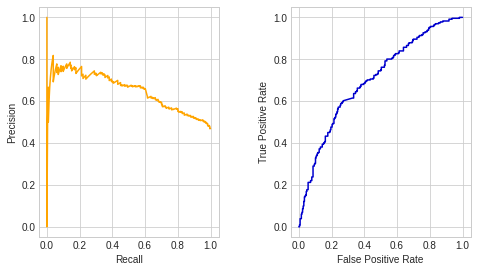

In [ ]:
SVM = svm.SVC( probability=True)
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM,x_train, x_test, y_train, y_test)

In [ ]:
# Tuning the hyperparameters
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}


svm_optimal = grid_search(svm.SVC(probability=True), parameters,x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.6s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.6s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   0.6s
[CV] END ..................C=0.1, gamma=auto, ke

Train confusion matrix is: 
[[775   0]
 [716   0]]

Test confusion matrix is: 
[[266   0]
 [231   0]]

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       266
           1       0.00      0.00      0.00       231

    accuracy                           0.54       497
   macro avg       0.27      0.50      0.35       497
weighted avg       0.29      0.54      0.37       497


Train accuracy score:  0.5197853789403085
Test accuracy score:  0.5352112676056338



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train ROC-AUC score:  0.9350486574157505
Test ROC-AUC score:  0.6921524590697523

Are under Precision-Recall curve: 0.0
Area under ROC-AUC: 0.6353189165073463


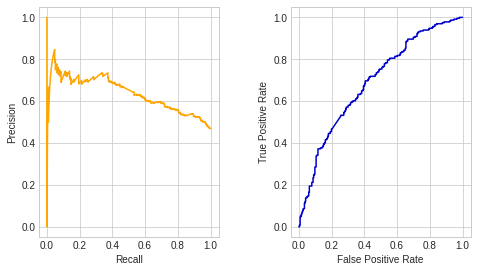

In [ ]:
so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc = check_scores(svm_optimal,x_train, x_test, y_train, y_test)

## GAUSSIAN NAIVE BAYES MODEL

Train confusion matrix is: 
[[739  36]
 [  0 716]]

Test confusion matrix is: 
[[115 151]
 [ 92 139]]

              precision    recall  f1-score   support

           0       0.56      0.43      0.49       266
           1       0.48      0.60      0.53       231

    accuracy                           0.51       497
   macro avg       0.52      0.52      0.51       497
weighted avg       0.52      0.51      0.51       497


Train accuracy score:  0.9758551307847082
Test accuracy score:  0.5110663983903421

Train ROC-AUC score:  0.9774193548387097
Test ROC-AUC score:  0.5147853399733099

Are under Precision-Recall curve: 0.5335892514395394
Area under ROC-AUC: 0.6320990313979554


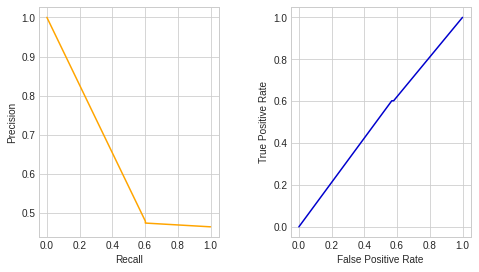

In [ ]:
g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc=check_scores(GaussianNB(),x_train.toarray(), x_test.toarray(), y_train, y_test)

## ADABOOST CLASSIFIER

Train confusion matrix is: 
[[674 101]
 [327 389]]

Test confusion matrix is: 
[[194  72]
 [134  97]]

              precision    recall  f1-score   support

           0       0.59      0.73      0.65       266
           1       0.57      0.42      0.48       231

    accuracy                           0.59       497
   macro avg       0.58      0.57      0.57       497
weighted avg       0.58      0.59      0.58       497


Train accuracy score:  0.7129443326626426
Test accuracy score:  0.5855130784708249

Train ROC-AUC score:  0.8067462605874933
Test ROC-AUC score:  0.60711844546431

Are under Precision-Recall curve: 0.485
Area under ROC-AUC: 0.5507313385282547


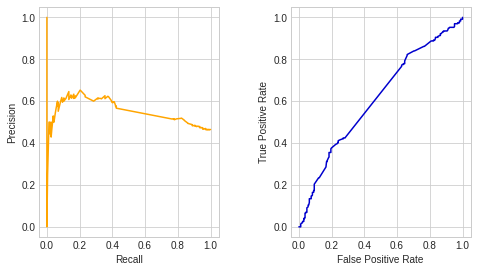

In [ ]:
a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=check_scores(AdaBoostClassifier(),x_train,x_test, y_train, y_test)

In [ ]:
params = {'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

ada_optimal_model = grid_search(AdaBoostClassifier(), params,x_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=   3.2s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=   3.2s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=50; total time=   0.3s
[CV] END algor

Train confusion matrix is: 
[[674 101]
 [327 389]]

Test confusion matrix is: 
[[194  72]
 [134  97]]

              precision    recall  f1-score   support

           0       0.59      0.73      0.65       266
           1       0.57      0.42      0.48       231

    accuracy                           0.59       497
   macro avg       0.58      0.57      0.57       497
weighted avg       0.58      0.59      0.58       497


Train accuracy score:  0.7129443326626426
Test accuracy score:  0.5855130784708249

Train ROC-AUC score:  0.8067462605874933
Test ROC-AUC score:  0.60711844546431

Are under Precision-Recall curve: 0.485
Area under ROC-AUC: 0.5507313385282547


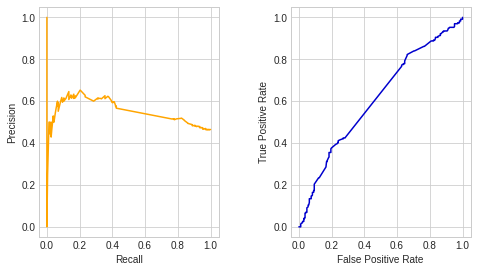

In [ ]:
ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc=check_scores(ada_optimal_model,x_train,x_test, y_train, y_test)

## BAGGING CLASSIFIER

Train confusion matrix is: 
[[771   4]
 [ 39 677]]

Test confusion matrix is: 
[[199  67]
 [122 109]]

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       266
           1       0.62      0.47      0.54       231

    accuracy                           0.62       497
   macro avg       0.62      0.61      0.61       497
weighted avg       0.62      0.62      0.61       497


Train accuracy score:  0.9711602951039571
Test accuracy score:  0.6197183098591549

Train ROC-AUC score:  0.9974842313930438
Test ROC-AUC score:  0.6634768740031898

Are under Precision-Recall curve: 0.5356265356265356
Area under ROC-AUC: 0.6227728653606548


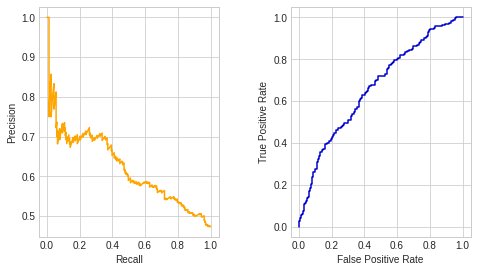

In [ ]:
kfold = model_selection.KFold(n_splits = 3)
  
# bagging classifier
model = BaggingClassifier(base_estimator = MultinomialNB(),
                          n_estimators = 100)

b_train_accuracy, b_test_accuracy, b_train_auc, b_test_auc= check_scores(model,x_train,x_test, y_train, y_test)

## RANDOM FOREST CLASSIFIER

Train confusion matrix is: 
[[775   0]
 [  0 716]]

Test confusion matrix is: 
[[194  72]
 [118 113]]

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       266
           1       0.61      0.49      0.54       231

    accuracy                           0.62       497
   macro avg       0.62      0.61      0.61       497
weighted avg       0.62      0.62      0.61       497


Train accuracy score:  1.0
Test accuracy score:  0.6177062374245473

Train ROC-AUC score:  1.0
Test ROC-AUC score:  0.6638511864075775

Are under Precision-Recall curve: 0.5432692307692307
Area under ROC-AUC: 0.6119096488907558


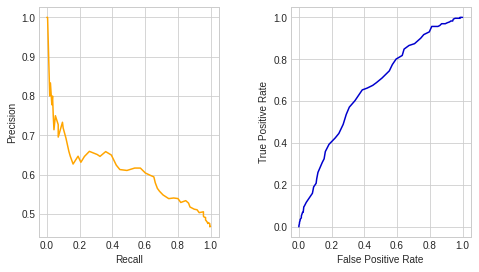

In [ ]:
r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc= check_scores(RandomForestClassifier(random_state=0).fit(x_train, y_train), x_train,x_test,y_train,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
rf_optimal=grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Train confusion matrix is: 
[[775   0]
 [716   0]]

Test confusion matrix is: 
[[266   0]
 [231   0]]

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       266
           1       0.00      0.00      0.00       231

    accuracy                           0.54       497
   macro avg       0.27      0.50      0.35       497
weighted avg       0.29      0.54      0.37       497


Train accuracy score:  0.5197853789403085
Test accuracy score:  0.5352112676056338

Train ROC-AUC score:  0.5633663723193368
Test ROC-AUC score:  0.5103668261562999

Are under Precision-Recall curve: 0.0
Area under ROC-AUC: 0.47138378029576333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



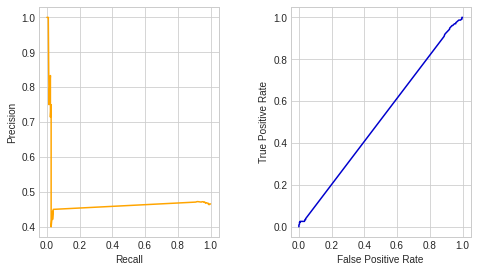

In [ ]:
ro_train_accuracy, ro_test_accuracy, ro_train_auc, ro_test_auc=check_scores(rf_optimal,x_train,x_test, y_train, y_test)

##XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier

Train confusion matrix is: 
[[713  62]
 [245 471]]

Test confusion matrix is: 
[[205  61]
 [135  96]]

              precision    recall  f1-score   support

           0       0.60      0.77      0.68       266
           1       0.61      0.42      0.49       231

    accuracy                           0.61       497
   macro avg       0.61      0.59      0.59       497
weighted avg       0.61      0.61      0.59       497


Train accuracy score:  0.7940979208584842
Test accuracy score:  0.6056338028169014

Train ROC-AUC score:  0.8921229050279329
Test ROC-AUC score:  0.6181118380366502

Are under Precision-Recall curve: 0.4948453608247423
Area under ROC-AUC: 0.5474521485632361


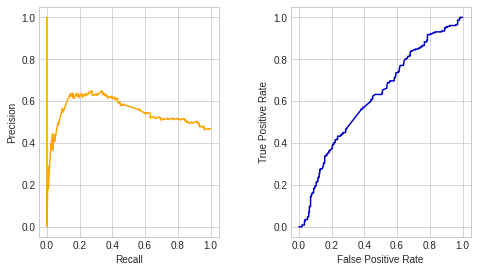

In [ ]:
x_train_accuracy, x_test_accuracy, x_train_auc, x_test_auc=check_scores(XGBClassifier(),x_train,x_test, y_train, y_test)

## ACCUARCY MATRIX

In [ ]:
data = [('Random Forest', ro_train_accuracy, ro_test_accuracy, ro_train_auc, ro_test_auc),
        ('SVM', so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc),
         ('AdaBoost',ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc ),
('Bagged MultinomialNB',b_train_accuracy, b_test_accuracy, b_train_auc, b_test_auc ),
('Gaussian Naive Bayes',g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc),
('XGBoost',x_train_accuracy, x_test_accuracy, x_train_auc, x_test_auc)
       ]


Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy', 'Train ROC', 'Test ROC'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy,Train ROC,Test ROC
Model Name,,,,
Random Forest,0.519785,0.535211,0.563366,0.510367
SVM,0.519785,0.535211,0.935049,0.692152
AdaBoost,0.712944,0.585513,0.806746,0.607118
Bagged MultinomialNB,0.971160,0.619718,0.997484,0.663477
Gaussian Naive Bayes,0.975855,0.511066,0.977419,0.514785
XGBoost,0.794098,0.605634,0.892123,0.618112


From the above fitted models,


 **Random** **Forest** **Classifer** and **SVM** models has given the same accuracy of **51** % and **53**% for the train and test data respectively after the  hyper parameter tuning .The other models are considered to be **bias** as there are more difference between the train and test accuracy's. Hence, for the corona sentimental analysis of tweets data **Random** **Forest** **Classifer** and **SVM** models are proved to be the best models.